# Accuracy Plot on RawNet

Module used to decide which sample size to use

In [1]:
import matplotlib.pyplot as plt

In [2]:
sizeLabels = ["30", "50", "100", "500", "1000", "2000", "3000", "5000", "7000", "10000"]
accTestRaw = [94.76, 94.4, 95.8, 86.4, 91.4, 77.8, 62.6, 61.8, 39.4, 52]

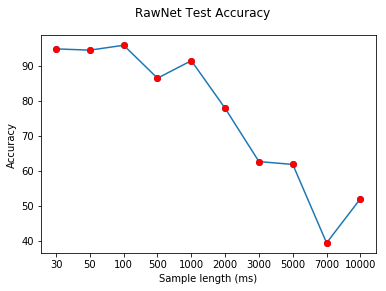

In [3]:
fig,ax = plt.subplots()
#plot line
line, = plt.plot(sizeLabels,accTestRaw, marker="o")
#plot points

plt.plot(sizeLabels, accTestRaw, "ro")
plt.xlabel('Sample length (ms)')
plt.ylabel('Accuracy')
plt.suptitle('RawNet Test Accuracy')

annot = ax.annotate("", xy=(0,0), xytext=(-20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)


In [4]:
def update_annot(ind):
    x,y = line.get_data()
    annot.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    text = "{}, {}ms".format(" ".join([str(accTestRaw[n]) for n in ind["ind"]]), 
                           " ".join([sizeLabels[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = line.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

In [5]:
fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()